In [1]:
import training_utils
import os

# hack to import camvid_data_manager and the rest of the files like segnet_model, etc.
import sys
sys.path.append('../')

import segnet_model
import kaggle_data_manager as kdm
from utils import init_logging, log_debug, log_info, log_warning, log_critical, log_exception
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"

%matplotlib inline
init_logging("../image_segmentation.ini")

## 1. Build the model, print summary and save the model.
log_info("Current working directory is %s" %os.getcwd())
log_info("Building segnet model with DICE_LOSS as the loss function")

segnet_instance, model = training_utils.build_or_load_model("../image_segmentation.ini", "optimizer.Adam(lr = 0.0001)",
                                                           segnet_model.LossType.DICE_LOSS)
print(model.summary())

Using TensorFlow backend.
INFO:root:Current working directory is /home/ubuntu/illinois/deeplearning/deep_learning_project/src
INFO:root:Building segnet model with DICE_LOSS as the loss function
INFO:root:Total number of gpus 4
INFO:root:Not loading existing weights as model is being retrained.
INFO:root:Failed to find saved model data. Building model for training.


Logging level is  20
Logging level is  20


INFO:root:Building model with DICE loss function


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_4 (

INFO:root:Training segnet model on Kaggle Carvana dataset with DICE_LOSS as the loss function
INFO:root:Config values read from ini file are
INFO:root:Data path is /home/ubuntu/illinois/data. Image Width 512, Image Height 512
INFO:root:Done printing config values
INFO:root:Training masks path is /home/ubuntu/illinois/data/train_masks.csv


Logging level is  20


INFO:root:Max training examples to use 5088
INFO:root:Image ids length 5088
INFO:root:Image path is /home/ubuntu/illinois/data/train 
INFO:root:total images are 5088 
INFO:root:Returning training images
INFO:root:Total training images is 5088
INFO:root:Image path is /home/ubuntu/illinois/data/train_masks 
INFO:root:total images are 5088 
INFO:root:Returning training images
INFO:root:Total training images in list is 5088
INFO:root:Here in plot_image()
INFO:root:00087a6bd4dc_01


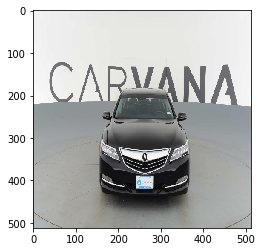

INFO:root:Here in plot_image_helper()


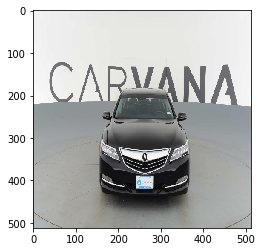

INFO:root:Here in plot_image()
INFO:root:00087a6bd4dc_01


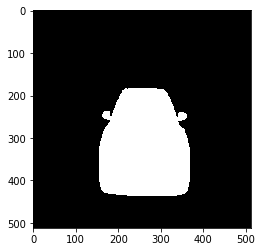

INFO:root:Log file path is carvana/training_logs
INFO:root:Model checkpoints path is carvana/checkpoints
INFO:root:Batch size is 8
INFO:root:Epochs is 30
INFO:root:Steps per epoch is 508
INFO:root:Validation steps is 127
INFO:root:In get_next_batch_validate()
INFO:root:In get_next_batch_train()


Epoch 1/30
508/508 [==============================] - 773s 2s/step - loss: 0.0610 - dice_coef: 0.9390 - val_loss: 0.0705 - val_dice_coef: 0.9295

Epoch 00001: val_loss improved from inf to 0.07045, saving model to carvana/checkpoints
Epoch 2/30
508/508 [==============================] - 751s 1s/step - loss: 0.0245 - dice_coef: 0.9755 - val_loss: 0.0282 - val_dice_coef: 0.9718

Epoch 00002: val_loss improved from 0.07045 to 0.02817, saving model to carvana/checkpoints
Epoch 3/30
508/508 [==============================] - 748s 1s/step - loss: 0.0190 - dice_coef: 0.9810 - val_loss: 0.0362 - val_dice_coef: 0.9638

Epoch 00003: val_loss did not improve from 0.02817
Epoch 4/30
508/508 [==============================] - 748s 1s/step - loss: 0.0186 - dice_coef: 0.9814 - val_loss: 0.0311 - val_dice_coef: 0.9689

Epoch 00004: val_loss did not improve from 0.02817
Epoch 5/30
508/508 [==============================] - 757s 1s/step - loss: 0.0142 - dice_coef: 0.9858 - val_loss: 0.0274 - val_dice_co

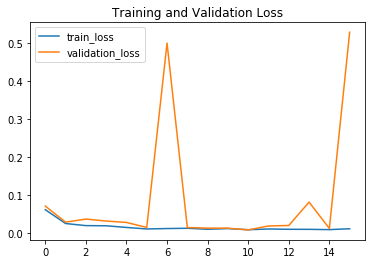

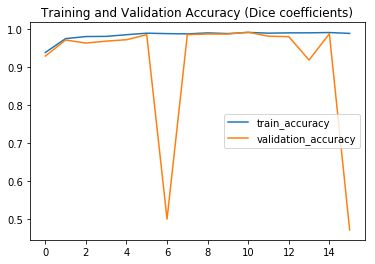

INFO:root:Done training model
INFO:root:
Saving model
INFO:root:
 Saved model structure to model file carvana/car_image_segmentation_nn_augmented_dice_loss.json and weights to carvana/cnn_image_segmentation_nn_augmented_dice_loss.h5


In [2]:
## 2. Model training.

log_info("Training segnet model on Kaggle Carvana dataset with DICE_LOSS as the loss function")

training_utils.train_model_helper("../image_segmentation.ini", "General", segnet_instance, model)